# Convolutional Neural Network

### Importing the libraries

In [ ]:
!pip install tensorflow        

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/home/neosoft/Documents/Github/PythonTaskFiles/cnn_mask_detection/mask_dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1088 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/home/neosoft/Documents/Github/PythonTaskFiles/cnn_mask_detection/mask_dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 98 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
34/34 [==============================] - 10s 271ms/step - loss: 0.5479 - accuracy: 0.7013 - val_loss: 0.4981 - val_accuracy: 0.7347
Epoch 2/25
34/34 [==============================] - 9s 255ms/step - loss: 0.3564 - accuracy: 0.8309 - val_loss: 0.1348 - val_accuracy: 0.9286
Epoch 3/25
34/34 [==============================] - 9s 251ms/step - loss: 0.3004 - accuracy: 0.8649 - val_loss: 0.1727 - val_accuracy: 0.9082
Epoch 4/25
34/34 [==============================] - 9s 251ms/step - loss: 0.2645 - accuracy: 0.8925 - val_loss: 0.2301 - val_accuracy: 0.9082
Epoch 5/25
34/34 [==============================] - 9s 250ms/step - loss: 0.2477 - accuracy: 0.8915 - val_loss: 0.1160 - val_accuracy: 0.9286
Epoch 6/25
34/34 [==============================] - 8s 250ms/step - loss: 0.2064 - accuracy: 0.9118 - val_loss: 0.1449 - val_accuracy: 0.9184
Epoch 7/25
34/34 [==============================] - 8s 249ms/step - loss: 0.1980 - accuracy: 0.9210 - val_loss: 0.1750 - val_accuracy: 0.9286
Epoch

## Part 4 - Making a single prediction

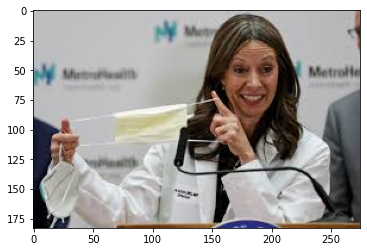

In [ ]:
import cv2
from matplotlib import pyplot as plt

predict_image = cv2.imread("/home/neosoft/Documents/Github/PythonTaskFiles/cnn_mask_detection/mask_dataset/images.jpeg")
predict_image = cv2.cvtColor(predict_image, cv2.COLOR_BGR2RGB)
plt.imshow(predict_image)

In [ ]:
import numpy as np
from keras.preprocessing import image
predict_image = image.load_img('/home/neosoft/Documents/Github/PythonTaskFiles/cnn_mask_detection/mask_dataset/images.jpeg', target_size = (64, 64))
predict_image = image.img_to_array(predict_image)
predict_image = np.expand_dims(predict_image, axis = 0)
result = cnn.predict(predict_image)
training_set.class_indices
if result[0][0] == 1:
  prediction_class = 'Properly worn mask'
else:
  prediction_class = 'Improperly worn mask'

print(prediction_class)

Improperly worn mask
